# MohammadReza Safarpour **404464116**




# 1. Setup & **Imports**

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import io
import os
import numpy as np

sns.set_style("whitegrid")


# **2. Download & Extract Yelp Dataset**

In [ ]:
url = "https://business.yelp.com/external-assets/files/Yelp-JSON.zip"
filename = "Yelp-JSON.zip"

headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, stream=True, headers=headers)
response.raise_for_status()

with open(filename, 'wb') as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

!unzip Yelp-JSON.zip
!tar -xf "Yelp JSON/yelp_dataset.tar" -C .


Archive:  Yelp-JSON.zip
   creating: Yelp JSON/
  inflating: Yelp JSON/Yelp Dataset Documentation & ToS copy.pdf  
  inflating: __MACOSX/Yelp JSON/._Yelp Dataset Documentation & ToS copy.pdf  
  inflating: Yelp JSON/yelp_dataset.tar  
  inflating: __MACOSX/Yelp JSON/._yelp_dataset.tar  


# **3. Load & Sample Data**

In [ ]:
business_file = 'yelp_academic_dataset_business.json'
review_file = 'yelp_academic_dataset_review.json'
user_file = 'yelp_academic_dataset_user.json'

# Sampling rates
sample_rate_business = 0.50
sample_rate_large = 0.10

# Business
sampled_business_lines = []
with open(business_file, 'r', encoding='utf-8') as f:
    for line in f:
        if random.random() < sample_rate_business:
            sampled_business_lines.append(line)
df_business_sampled = pd.read_json(io.StringIO(''.join(sampled_business_lines)), lines=True)

# Review
sampled_review_lines = []
with open(review_file, 'r', encoding='utf-8') as f:
    for line in f:
        if random.random() < sample_rate_large:
            sampled_review_lines.append(line)
df_review_sampled = pd.read_json(io.StringIO(''.join(sampled_review_lines)), lines=True)

# User
sampled_user_lines = []
with open(user_file, 'r', encoding='utf-8') as f:
    for line in f:
        if random.random() < sample_rate_large:
            sampled_user_lines.append(line)
df_user_sampled = pd.read_json(io.StringIO(''.join(sampled_user_lines)), lines=True)

# Final DataFrames for assignment
df_business = df_business_sampled
df_review = df_review_sampled
df_user = df_user_sampled


In [ ]:
# Robust setup: run this once before scenarios


sns.set_style("whitegrid")

# If df_business/df_review/df_user already exist, keep them;
# otherwise raise a clear error.
required = ['df_business', 'df_review', 'df_user']
missing = [name for name in required if name not in globals()]
if missing:
    raise RuntimeError(f"Missing DataFrames: {missing}. Please run the data loading cells first.")

# Coerce types safely used by plots
if 'date' in df_review.columns:
    df_review = df_review.copy()
    df_review['review_date'] = pd.to_datetime(df_review['date'], errors='coerce')


# Scenario 1: Line Chart – Trend of User **Reviews**

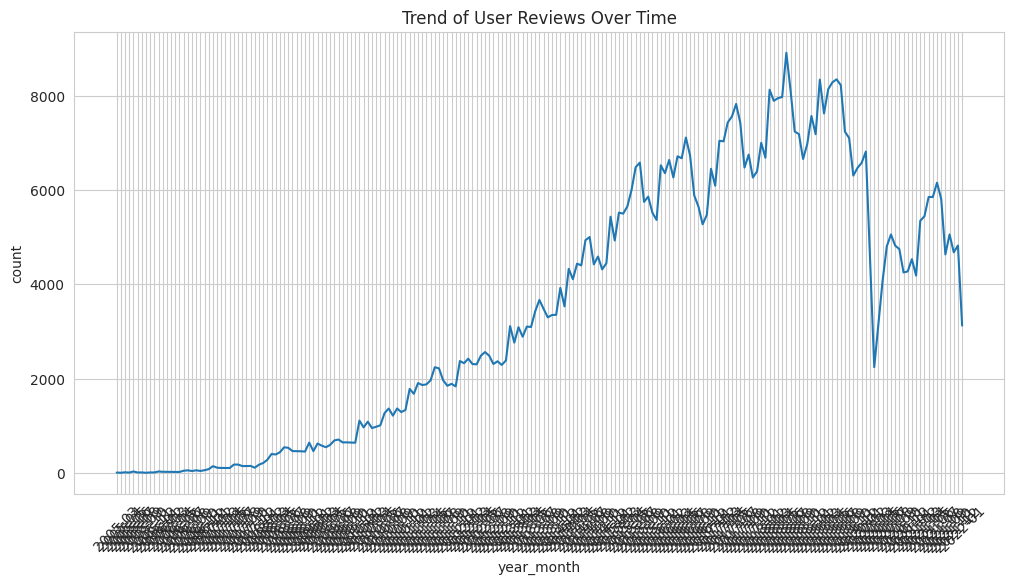

In [ ]:
# Scenario 1: Line Chart - Trend of User Reviews (fixed)
df_review['review_date'] = pd.to_datetime(df_review['date'])
df_review['year_month'] = df_review['review_date'].dt.to_period('M').astype(str)  # convert to string
reviews_per_month = df_review.groupby('year_month').size().reset_index(name='count')

plt.figure(figsize=(12,6))
sns.lineplot(data=reviews_per_month, x='year_month', y='count')
plt.title("Trend of User Reviews Over Time")
plt.xticks(rotation=45)
plt.show()


# **Scenario 2: Scatter Plot – Popularity vs Quality**

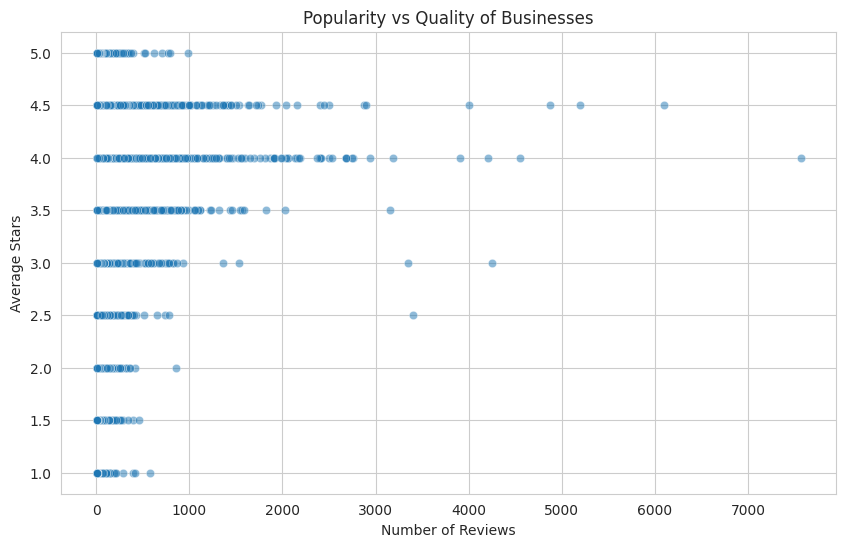

In [ ]:
# Scenario 2: Scatter Plot - Popularity vs Quality
business_stats = df_business[['review_count','stars']].dropna()

plt.figure(figsize=(10,6))
sns.scatterplot(data=business_stats, x='review_count', y='stars', alpha=0.5)
plt.title("Popularity vs Quality of Businesses")
plt.xlabel("Number of Reviews")
plt.ylabel("Average Stars")
plt.show()


# Scenario 3: Rel Plot - Comparing Two **Cities**

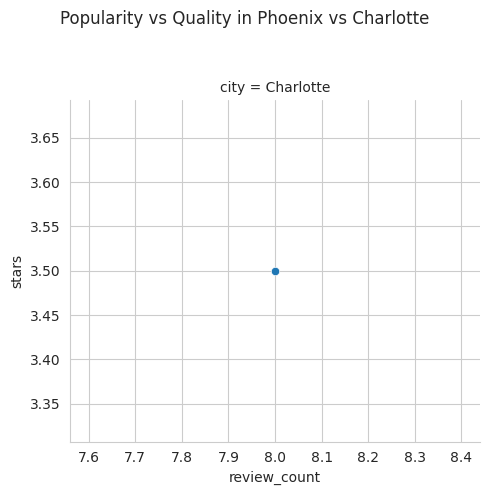

In [ ]:
# Scenario 3: Rel Plot - Comparing Two Cities
cities = ['Phoenix','Charlotte']
df_city = df_business[df_business['city'].isin(cities)].dropna(subset=['review_count','stars'])

sns.relplot(data=df_city, x='review_count', y='stars', col='city', kind='scatter', height=5, aspect=1)
plt.subplots_adjust(top=0.8)
plt.suptitle("Popularity vs Quality in Phoenix vs Charlotte")
plt.show()



# Scenario 4: Bar Plot - Quality by **Price** **bold text**

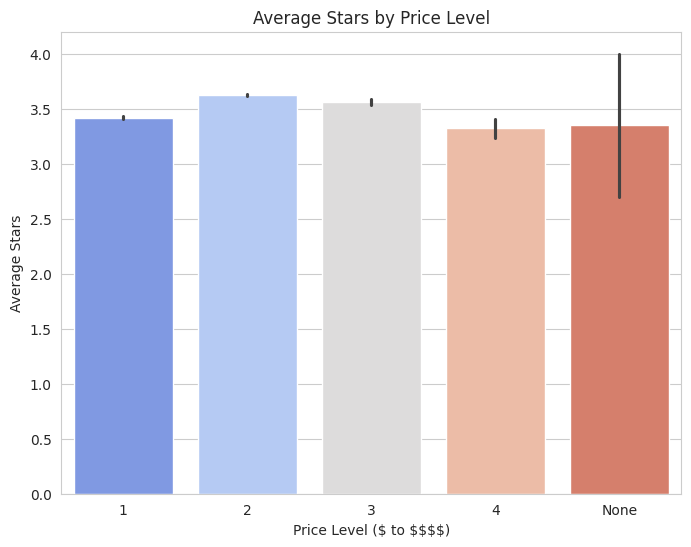

In [ ]:
# Scenario 4: Bar Plot - Quality by Price (clean version)
df_price = df_business.dropna(subset=['attributes']).copy()
df_price.loc[:, 'price'] = df_price['attributes'].apply(
    lambda x: x.get('RestaurantsPriceRange2') if isinstance(x, dict) else None
)
df_price = df_price.dropna(subset=['price'])

plt.figure(figsize=(8,6))
sns.barplot(data=df_price, x='price', y='stars', hue='price', palette='coolwarm', legend=False)
plt.title("Average Stars by Price Level")
plt.xlabel("Price Level ($ to $$$$)")
plt.ylabel("Average Stars")
plt.show()


# **Scenario 5: Count Plot - Distribution of Review Stars**

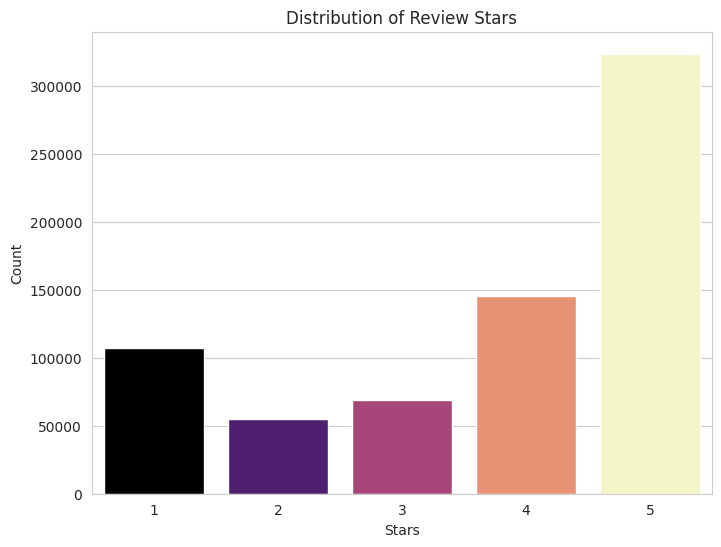

In [ ]:
# Scenario 5: Count Plot - Distribution of Review Stars
plt.figure(figsize=(8,6))
sns.countplot(data=df_review, x='stars', hue='stars', palette='magma', legend=False)
plt.title("Distribution of Review Stars")
plt.xlabel("Stars")
plt.ylabel("Count")
plt.show()



# **Scenario 6: Cat Plot - Ratings by Cuisine**

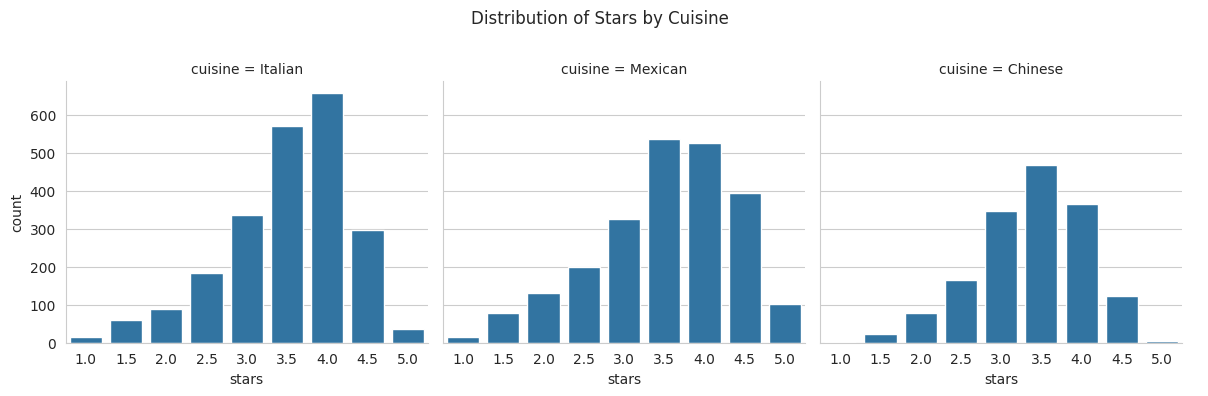

In [ ]:
# Scenario 6: Cat Plot - Ratings by Cuisine (fixed with explode)
cuisines = ['Italian','Mexican','Chinese']
df_cuisine = df_business.dropna(subset=['categories']).copy()
df_cuisine = df_cuisine.assign(
    cuisine=df_cuisine['categories'].str.split(', ')
).explode('cuisine')
df_cuisine = df_cuisine[df_cuisine['cuisine'].isin(cuisines)]

sns.catplot(data=df_cuisine, x='stars', col='cuisine', kind='count', col_wrap=3, height=4)
plt.subplots_adjust(top=0.8)
plt.suptitle("Distribution of Stars by Cuisine")
plt.show()


## Scenario 7: Dist Plot - User Activity **Distribution**

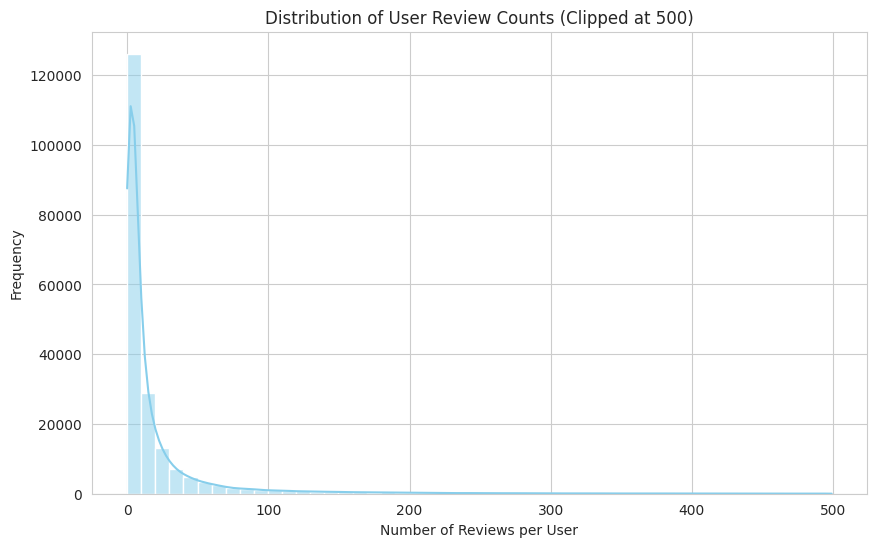

In [ ]:
# Scenario 7: Dist Plot - User Activity Distribution (fixed)
# Clip extreme outliers for better visualization
df_user_clipped = df_user[df_user['review_count'] < 500]  # most users <500 reviews

plt.figure(figsize=(10,6))
sns.histplot(df_user_clipped['review_count'], kde=True, bins=50, color='skyblue')
plt.title("Distribution of User Review Counts (Clipped at 500)")
plt.xlabel("Number of Reviews per User")
plt.ylabel("Frequency")
plt.show()


## **Scenario 8: KDE Plot - Density of Business Ratings**

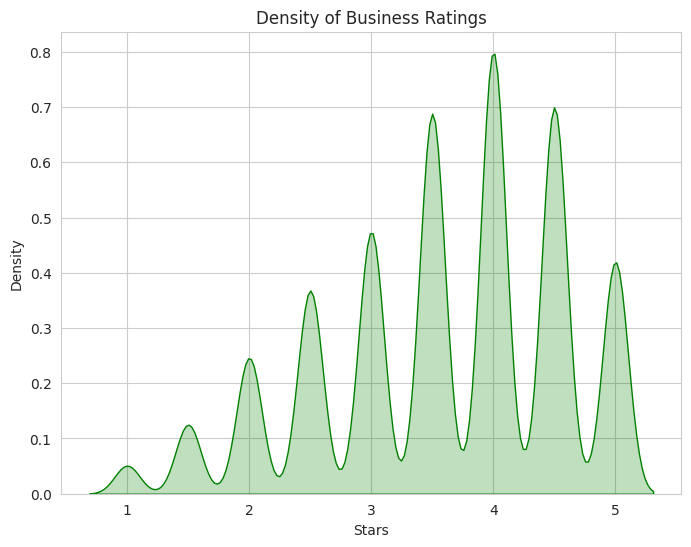

In [ ]:
# Scenario 8: KDE Plot - Density of Business Ratings
plt.figure(figsize=(8,6))
sns.kdeplot(df_business['stars'], fill=True, color='green')
plt.title("Density of Business Ratings")
plt.xlabel("Stars")
plt.show()

## **Scenario 9: Swarm Plot - Ratings by Business Type**

/tmp/ipython-input-1956857226.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_violin, x='category', y='stars', palette='Set2', inner='quartile')


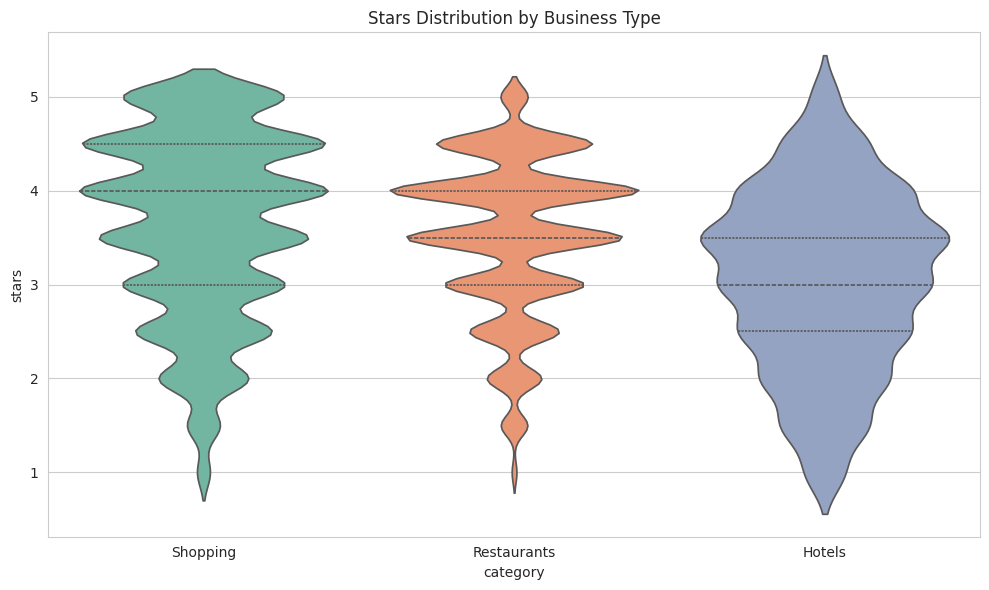

In [ ]:
# Scenario 9: Violin Plot - Ratings by Business Type
categories = ['Restaurants','Shopping','Hotels']
df_violin = df_business.dropna(subset=['categories']).copy()
df_violin = df_violin.assign(category=df_violin['categories'].str.split(', ')).explode('category')
df_violin = df_violin[df_violin['category'].isin(categories)].dropna(subset=['stars'])

plt.figure(figsize=(10,6))
sns.violinplot(data=df_violin, x='category', y='stars', palette='Set2', inner='quartile')
plt.title("Stars Distribution by Business Type")
plt.tight_layout()
plt.show()


# Scenario 10: Strip Plot - Ratings by Neighborhood

/tmp/ipython-input-1670125826.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_pc_top = df_pc_top.groupby('postal_code', group_keys=False).apply(
/tmp/ipython-input-1670125826.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df_pc_top, x='postal_code', y='stars', palette='Blues')


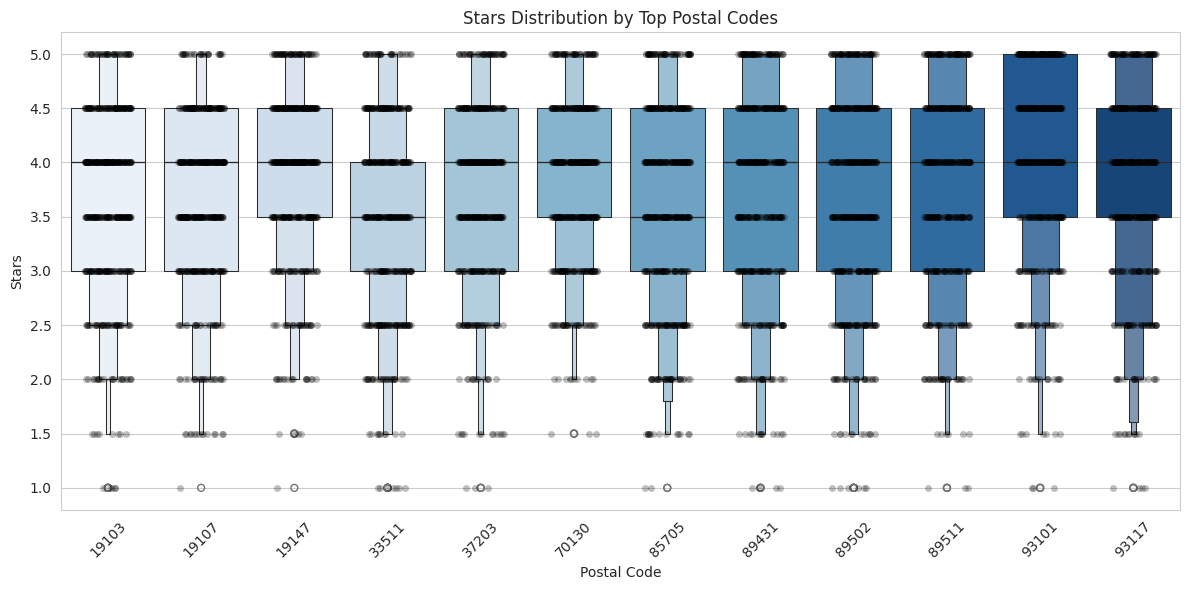

In [ ]:
# Scenario 10: Strip Plot - Ratings by Neighborhood (postal_code proxy, robust)
df_pc = df_business.dropna(subset=['postal_code', 'stars']).copy()

# Focus on the top 12 postal codes by business count
top_pcs = df_pc['postal_code'].value_counts().head(12).index.tolist()
df_pc_top = df_pc[df_pc['postal_code'].isin(top_pcs)]

# Sample per postal code for readability
df_pc_top = df_pc_top.groupby('postal_code', group_keys=False).apply(
    lambda g: g.sample(n=min(500, len(g)), random_state=42)
)

plt.figure(figsize=(12,6))
sns.boxenplot(data=df_pc_top, x='postal_code', y='stars', palette='Blues')
sns.stripplot(data=df_pc_top, x='postal_code', y='stars', color='black', alpha=0.25, jitter=0.25)
plt.title("Stars Distribution by Top Postal Codes")
plt.xlabel("Postal Code")
plt.ylabel("Stars")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# **Scenario 11: Box Plot - Popularity by Business Type**

/tmp/ipython-input-3501353870.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_box, x='category', y='review_count', palette='pastel')


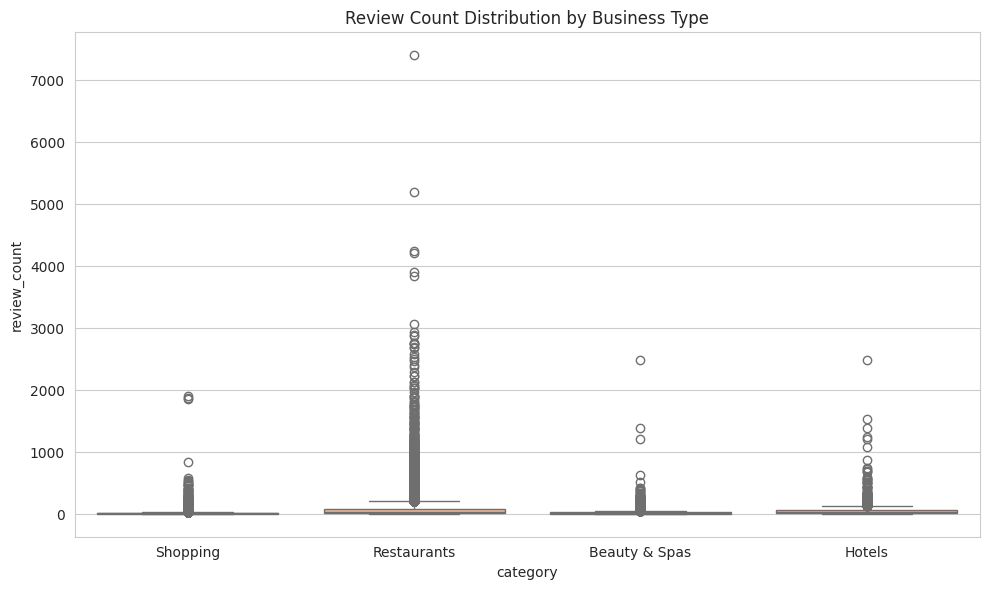

In [ ]:
# Scenario 11: Box Plot - Popularity by Business Type (robust explode)
categories = ['Restaurants','Shopping','Hotels','Beauty & Spas']
df_box = df_business.dropna(subset=['categories']).copy()
df_box = df_box.assign(category=df_box['categories'].str.split(', ')).explode('category')
df_box = df_box[df_box['category'].isin(categories)].dropna(subset=['review_count'])

plt.figure(figsize=(10,6))
sns.boxplot(data=df_box, x='category', y='review_count', palette='pastel')
plt.title("Review Count Distribution by Business Type")
plt.tight_layout()
plt.show()


## **Scenario 12: Pair Plot - User Metrics**

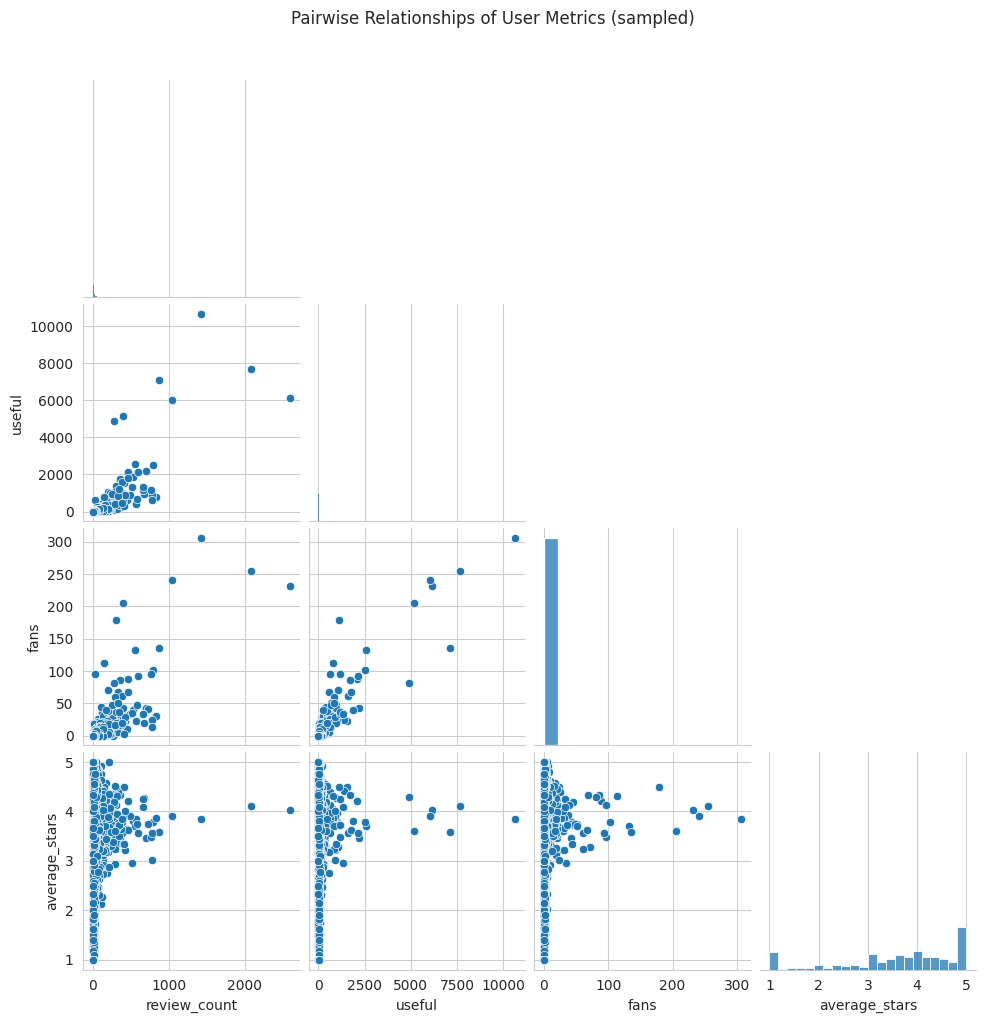

In [ ]:
# Scenario 12: Pair Plot - User Metrics (robust)
df_user_metrics = df_user[['review_count','useful','fans','average_stars']].dropna()

# Sample to avoid heavy rendering
df_user_sample = df_user_metrics.sample(n=min(5000, len(df_user_metrics)), random_state=42)

g = sns.pairplot(df_user_sample, diag_kind='hist', corner=True)
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle("Pairwise Relationships of User Metrics (sampled)", y=1.02)
plt.show()



## **Scenario 13: Reg Plot - Popularity vs Quality**

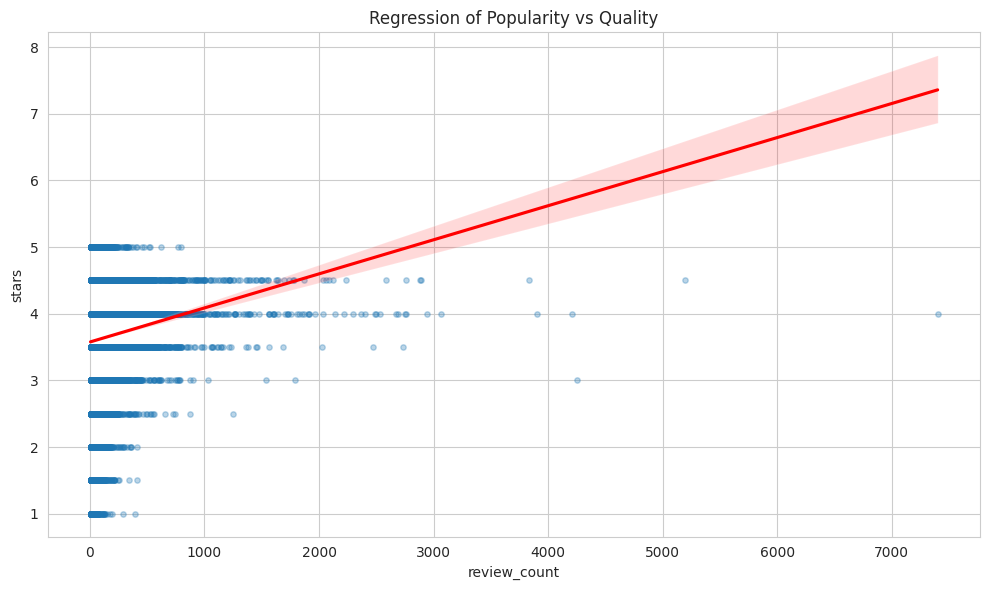

In [ ]:
# Scenario 13: Reg Plot - Popularity vs Quality (robust)
plt.figure(figsize=(10,6))
sns.regplot(data=df_business.dropna(subset=['review_count','stars']),
            x='review_count', y='stars', scatter_kws={'alpha':0.3, 's':15}, line_kws={'color':'red'})
plt.title("Regression of Popularity vs Quality")
plt.tight_layout()
plt.show()



## Scenario 14: Joint Plot - Popularity vs Quality with **Marginals**

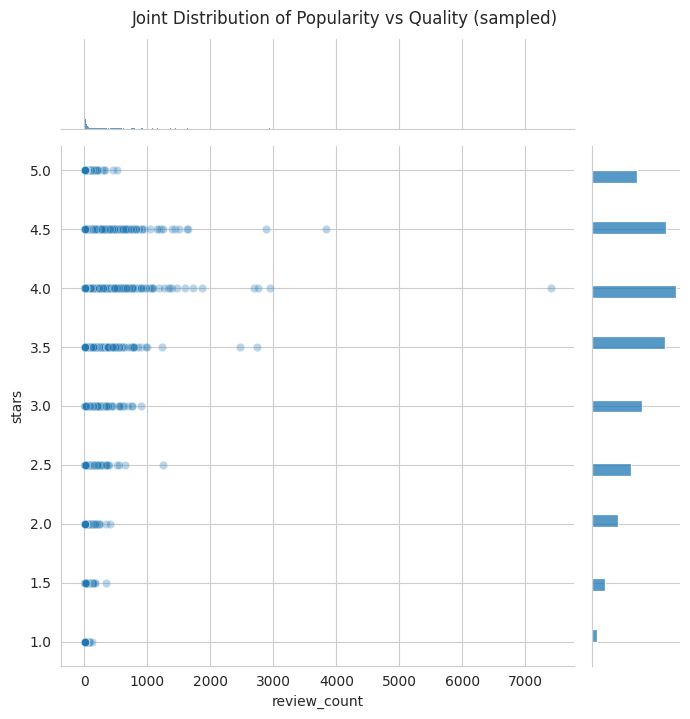

In [ ]:
# Scenario 14: Joint Plot - Popularity vs Quality with Marginals (robust)
df_biv = df_business[['review_count','stars']].dropna()
df_biv_sample = df_biv.sample(n=min(20000, len(df_biv)), random_state=42)

g = sns.jointplot(data=df_biv_sample, x='review_count', y='stars', kind='scatter', alpha=0.3, height=7)
plt.suptitle("Joint Distribution of Popularity vs Quality (sampled)", y=1.02)
plt.show()



## Scenario 15: Heat Map - Correlation of User **Metrics**

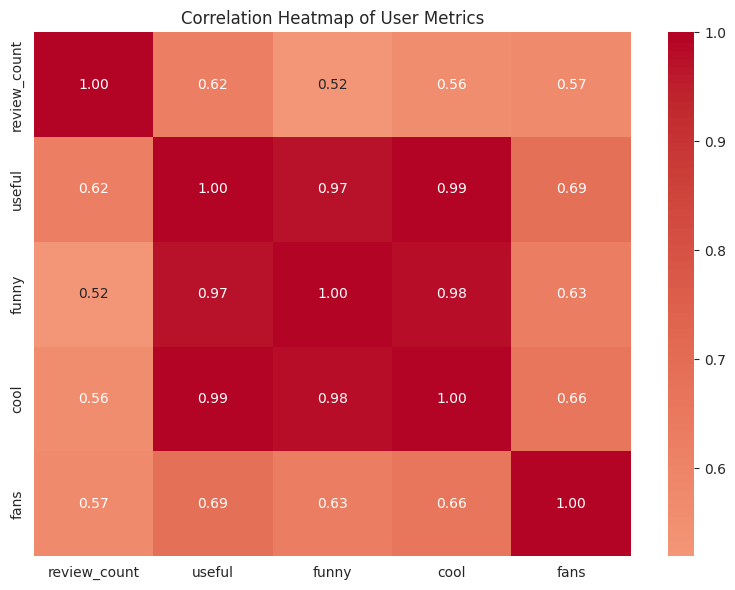

In [ ]:
# Scenario 15: Heat Map - Correlation of User Metrics (robust)
metrics = df_user[['review_count','useful','funny','cool','fans']].dropna()
corr = metrics.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Heatmap of User Metrics")
plt.tight_layout()
plt.show()

